## Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np

In [18]:
#Goal of this project is to predict the car price using features of the car
car_prices_data = pd.read_csv("./data/data.csv")
car_prices_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Clean up and view the distribution of data

In [28]:
#Make column names consistent
car_prices_data.columns = car_prices_data.columns.str.lower().str.replace(" ", "_")
car_prices_data.head()
car_prices_data.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [51]:
#Print unique values in each string columns
cols = car_prices_data.select_dtypes(include=["object"])
for c in cols:
    unique_values = car_prices_data[c].unique()
    print(c)
    print(unique_values)
    print(car_prices_data[c].nunique())
    print()
    
print("Max year & Min make year")
print(car_prices_data["year"].max())
print(car_prices_data["year"].min())


make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
48

model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti'

### Distribution of prices

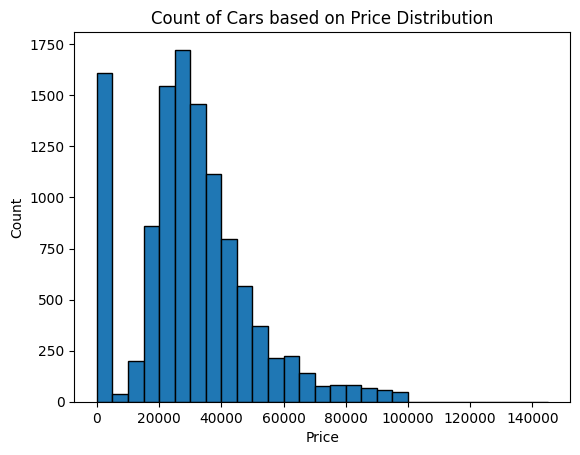

In [76]:
import matplotlib.pyplot as plt
bin_edges = []  
for bin in range(0,150000,5000):
    bin_edges.append(bin)
plt.hist(car_prices_data[car_prices_data['msrp']<100000]['msrp'], bins=bin_edges, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Count of Cars based on Price Distribution')
plt.show()